# Replication Notebook

### Selective and Incentive Effects of Elections: Evidence from State Supreme Courts

### Elliott Ash and Bentley MacLeod


This notebook includes the stata code for replicating the tables and figures in the main text. Additional results and robustness checks are included in the accompanying replication-appendix.ipynb.

---

## Install necessary packages and make directories if needed

In [1]:
capture quietly ssc install fsum
capture quietly ssc install ivreg2
capture quietly ssc install ftools
capture quietly ssc install reghdfe
capture quietly ssc install cmogram
capture quietly ssc install binscatter

capture quietly mkdir 0-summ-stats
capture quietly mkdir 1-select
capture quietly mkdir 2-elect
capture quietly mkdir 3-retain

## Load data and set macros

In [2]:
set more off
set matsize 10000
capture quietly restore

clear all
use elections_ready, clear

local yvars "action_affirm_m txt_words txt_words_m txt_vocab_m txt_vocabnorm_m txt_words_per_sent txt_chars_per_word dis_numops con_numops proc_pubdays_m toc_total_m toc_unique_m casetype_admin_m casetype_con_m casetype_crim_m casetype_civ_m"
local qvars "numops cites_pos cites_pos_m cites_neg cites_neg_m cites_outstate cites_outstate_m cites_quote cites_quote_m cites_discuss cites_discuss_m cites_overruled cites_overruled_m cites_supersede cites_supersede_m cites10_pos cites10_pos_m"
local rule_controls "rule_adminoffice rule_iac rule_judgesup rule_ntou rule_termdown rule_termup rule_utop rule_ptonp rule_judicialexpend"
local judge_controls "x_startage x_female x_democrat x_republican x_topschool x_startage_missing   x_topschool_missing"
local mainvars "txt_words_norm cites_pos_m_norm"
local additional_vars " txt_chars_norm txt_sents_norm  toc_total_norm cites_all_m_norm cites_discuss_m_norm  cites_outstate_m_norm"
local morevars "disc_numops dis_numops con_numops casetype_admin_m casetype_crim_m casetype_con_m casetype_civ_m txt_words_m toc_unique_m_norm  cites_disting_m cites_neg_m cites_circuit_m cites_multuse_m proc_pubdays_m"
local main_st "txt_words_norm_st cites_pos_m_norm_st" 
local main_j "txt_words_norm_j cites_pos_m_norm_j"
local additional_st "txt_chars_norm_st txt_sents_norm_st  cites_all_m_norm_st cites_discuss_m_norm_st  cites_outstate_m_norm_st" 
local additional_j "txt_chars_norm_j txt_sents_norm_j  cites_all_m_norm_j cites_discuss_m_norm_j cites_outstate_m_norm_j"


# Summary Statistics

List variables with labels.

In [3]:
foreach var of varlist `qvars' `yvars' `rule_controls' `judge_controls' {
di "`var'" _col(20) "`: var l `var''" _col(50)  "`: val l `var''"
}


numops             number of opinions written    
cites_pos          positive citations to opinion 
cites_pos_m        positive citations to opinion (mean)
cites_neg          negative citations to opinion 
cites_neg_m        negative citations to opinion (mean)
cites_outstate     positive citations to opinion by courts in other states
cites_outstate_m   positive citations to opinion by courts in other states (mean)
cites_quote        quoted-directly citations to opinion
cites_quote_m      quoted-directly citations to opinion (mean)
cites_discuss      discussed-in citations to opinion
cites_discuss_m    discussed-in citations to opinion (mean)
cites_overruled    number of future cases that overrule this opinion
cites_overruled_m  number of future cases that overrule this opinion (mean)
cites_supersede    number of times the ruling is superseded by statute
cites_supersede_m  number of times the ruling is superseded by statute (mean)
cites10_pos        positive citations (within ten year

Summary statistics, for all judges.

In [4]:
fsum `qvars' `yvars' `rule_controls' `judge_controls'


            Variable |        N     Mean       SD      Min      Max                                                                                                                              
---------------------+---------------------------------------------
              numops |    15010    25.73    15.86     5.00   336.00  
           cites_pos |    15010   297.73   273.50     0.00  6133.00  
         cites_pos_m |    15010    13.05    12.52     0.00   342.54  
           cites_neg |    15010    11.95    15.89     0.00   246.00  
         cites_neg_m |    15010     0.58     0.88     0.00    20.62  
      cites_outstate |    15010    44.60    81.27     0.00  2308.00  
    cites_outstate_m |    15010     1.82     2.34     0.00    79.59  
         cites_quote |    15010    71.64    72.11     0.00  1525.00  
       cites_quote_m |    15010     3.28     3.73     0.00    86.91  
       cites_discuss |    15010    66.77    53.54     0.00   902.00  
     cites_discuss_m |    15010     2

Summary statistics in partisan election systems.

In [5]:
fsum `qvars' `yvars' `rule_controls' `judge_controls' if rule_howretain == "P"


            Variable |        N     Mean       SD      Min      Max                                                                                                                              
---------------------+---------------------------------------------
              numops |     5451    28.39    18.84     5.00   160.00  
           cites_pos |     5451   300.94   323.69     0.00  4821.00  
         cites_pos_m |     5451    12.95    14.76     0.00   341.55  
           cites_neg |     5451    11.55    15.57     0.00   170.00  
         cites_neg_m |     5451     0.61     1.03     0.00    20.62  
      cites_outstate |     5451    59.87   128.10     0.00  2308.00  
    cites_outstate_m |     5451     2.13     3.31     0.00    79.59  
         cites_quote |     5451    65.26    79.70     0.00  1525.00  
       cites_quote_m |     5451     2.93     3.88     0.00    86.91  
       cites_discuss |     5451    61.13    57.87     0.00   857.00  
     cites_discuss_m |     5451     2

Summary statistic in non-partisan election systems.

In [6]:
fsum `qvars' `yvars' `rule_controls' `judge_controls' if rule_howretain == "NP"


            Variable |        N     Mean       SD      Min      Max                                                                                                                              
---------------------+---------------------------------------------
              numops |     3307    24.20    12.88     5.00   157.00  
           cites_pos |     3307   235.31   162.93     0.00  2197.00  
         cites_pos_m |     3307    10.31     6.00     0.00    69.33  
           cites_neg |     3307     8.58     9.83     0.00    82.00  
         cites_neg_m |     3307     0.40     0.52     0.00     6.86  
      cites_outstate |     3307    33.00    22.93     0.00   178.00  
    cites_outstate_m |     3307     1.44     0.85     0.00     6.86  
         cites_quote |     3307    56.99    45.98     0.00   696.00  
       cites_quote_m |     3307     2.54     2.00     0.00    30.00  
       cites_discuss |     3307    62.47    44.60     0.00   470.00  
     cites_discuss_m |     3307     2

Summary statistics in merit systems.

In [7]:
fsum `qvars' `yvars' `rule_controls' `judge_controls' if rule_howretain == "U"


            Variable |        N     Mean       SD      Min      Max                                                                                                                              
---------------------+---------------------------------------------
              numops |     3185    26.56    16.33     5.00   336.00  
           cites_pos |     3185   362.24   239.05     0.00  5297.00  
         cites_pos_m |     3185    14.83     9.70     0.00   311.59  
           cites_neg |     3185    18.80    21.43     0.00   246.00  
         cites_neg_m |     3185     0.81     1.01     0.00    10.00  
      cites_outstate |     3185    41.83    34.09     0.00   986.00  
    cites_outstate_m |     3185     1.83     1.84     0.00    58.00  
         cites_quote |     3185    88.50    63.39     0.00   633.00  
       cites_quote_m |     3185     3.83     3.07     0.00    39.56  
       cites_discuss |     3185    85.81    54.27     0.00   902.00  
     cites_discuss_m |     3185     3

Tabulation of judge-year observations by judge selection system. G = governor, L = legislature, M = merit, NP = nonpartisan, and P = partisan.

In [8]:
tab xc_howselected 


xc_howselec |
        ted |      Freq.     Percent        Cum.
------------+-----------------------------------
          G |      1,877       15.11       15.11
          L |        511        4.11       19.22
          M |      1,593       12.82       32.04
         NP |      2,995       24.11       56.15
          P |      5,448       43.85      100.00
------------+-----------------------------------
      Total |     12,424      100.00


Tabulation of judge-year observations by judge retention system. G=governor, L=legislature, T=life tenure, P = partisan elections, NP = nonpartisan elections, U = uncontested elections. 

In [9]:
tab rule_howretain


retention:G |
=governor,L |
=legisl.,T= |
tenure,P=pa |
rt.elect,NP |
=nonpart.el |
ect,U=uncon |
        tes |      Freq.     Percent        Cum.
------------+-----------------------------------
          G |      1,035        6.90        6.90
          L |        773        5.15       12.05
          N |        148        0.99       13.03
         NP |      3,307       22.03       35.06
          P |      5,451       36.32       71.38
          T |      1,111        7.40       78.78
          U |      3,185       21.22      100.00
------------+-----------------------------------
      Total |     15,010      100.00


---

## Output and Quality

Compute judge fixed effects from residuals, and plot histograms for work output and work quality.



(8 missing values generated)

(2 missing values generated)

(bin=41, start=-1.7823665, width=.0939166)


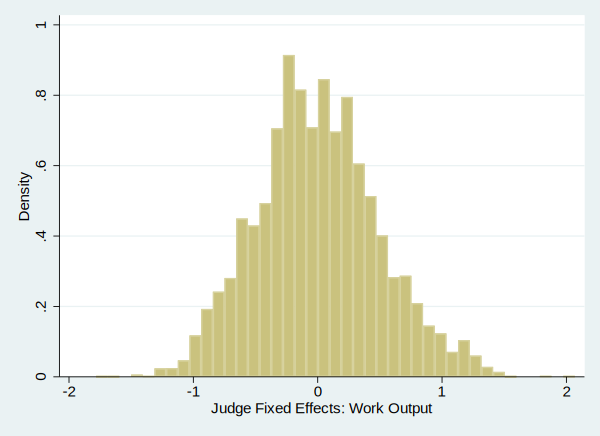

In [10]:
qui areg txt_words_norm_st pca_*, absorb(stateyearfe)
predict resids_output, residuals
bys judgenum: egen resids_judgemean_output = mean(resids_output)
hist resids_judgemean, xtitle("Judge Fixed Effects: Work Output")



(14 missing values generated)

(2 missing values generated)

(bin=41, start=-2.0101595, width=.10812459)


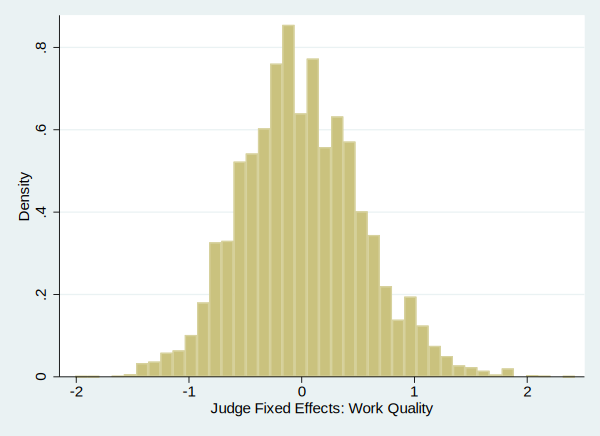

In [11]:
qui areg cites_pos_m_norm_st pca_*, absorb(stateyearfe)
predict resids_quality, residuals
bys judgenum: egen resids_judgemean_quality = mean(resids_quality)
hist resids_judgemean_quality, xtitle("Judge Fixed Effects: Work Quality")



(file 0-summ-stats/quality-vs-output-st.pdf written in PDF format)


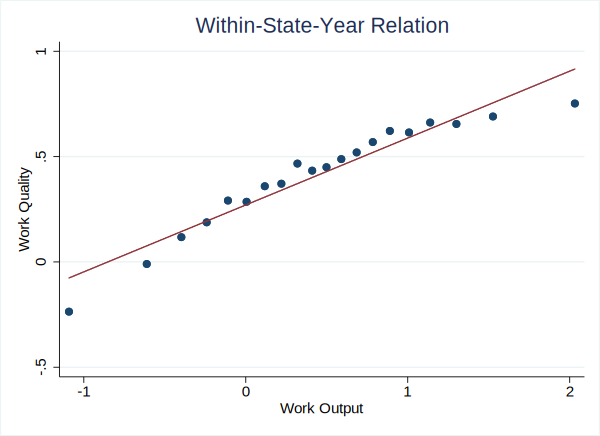

In [12]:
binscatter cites_pos_m_st txt_words_st, title(Within-State-Year Relation) xtitle("Work Output") ytitle("Work Quality") 
graph export 0-summ-stats/quality-vs-output-st.pdf, replace
graph display



(file 0-summ-stats/quality-vs-output-j.pdf written in PDF format)


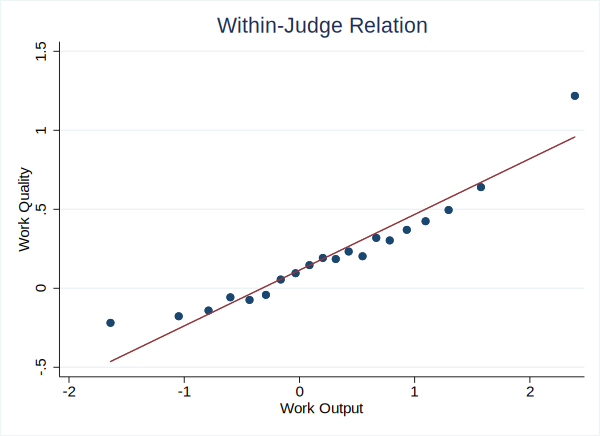

In [13]:
binscatter cites_pos_m_j txt_words_j, title(Within-Judge Relation) xtitle("Work Output") ytitle("Work Quality") 
graph export 0-summ-stats/quality-vs-output-j.pdf, replace
graph display

---

### Summary statistics on bar association evaluations.

In [14]:
su x_rating_good if year >= 1988


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
x_rating_g~d |        170    .8705882    .3366467          0          1


Plot work quality and work output versus bar evaluations.

In [15]:
bysort state: egen rating_m = mean(x_rating_avg)
bysort state: egen rating_sd = sd(x_rating_avg)
gen ratingnorm = (x_rating_avg - rating_m) / rating_sd


(11841 missing values generated)

(11841 missing values generated)

(14,774 missing values generated)


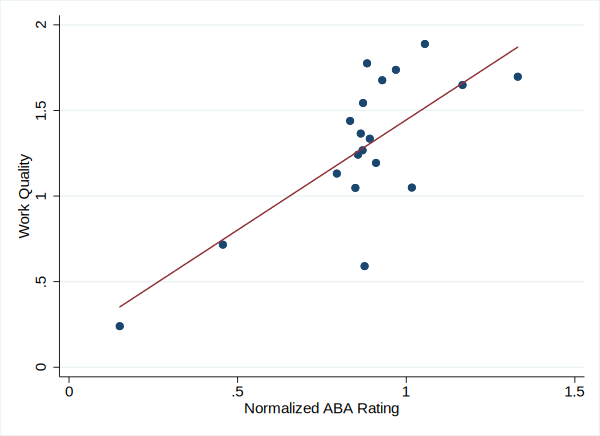

In [16]:
binscatter cites_pos_m_norm_st x_rating_good if year >= 1988, absorb(stateyear) controls(pca_*) xtitle("Normalized ABA Rating") ytitle("Work Quality") 
graph display

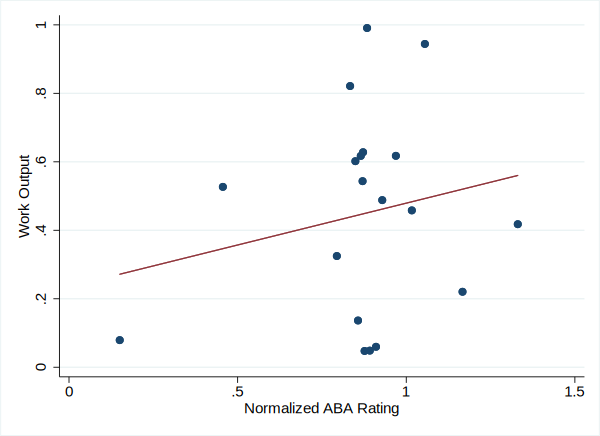

In [17]:
binscatter txt_words_norm_st x_rating_good if year >= 1988, absorb(stateyear) controls(pca_*) xtitle("Normalized ABA Rating") ytitle("Work Output") 
graph display

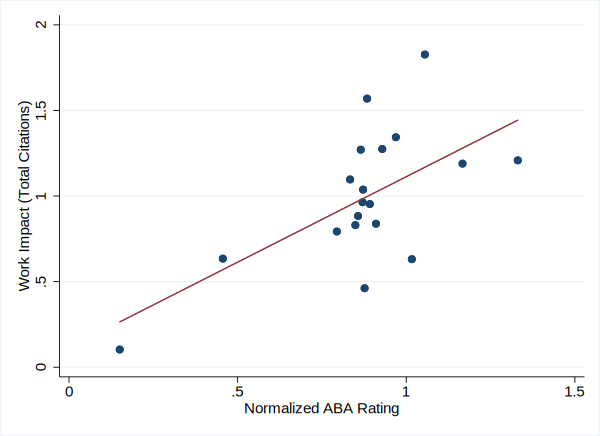

In [18]:
binscatter cites_pos_norm_st x_rating_good if year >= 1988, absorb(stateyear) controls(pca_*) xtitle("Normalized ABA Rating") ytitle("Work Impact (Total Citations)") 
graph display

Conditional logit regressions of work quality and work output on bar association ratings.

In [19]:
eststo clear
eststo: clogit x_rating_good i.year pca_* cites_pos_m_norm_st if year >= 1988, group(state) cl(state)
eststo: clogit x_rating_good i.year pca_* txt_words_norm_st if year >= 1988, group(state) cl(state)
eststo: clogit x_rating_good i.year pca_* cites_pos_m_norm_st txt_words_norm_st if year >= 1988, group(state) cl(state)



note: multiple positive outcomes within groups encountered.
note: 6 groups (109 obs) dropped because of all positive or
      all negative outcomes.

Iteration 0:   log pseudolikelihood = -20.486151  
Iteration 1:   log pseudolikelihood = -19.128537  
Iteration 2:   log pseudolikelihood = -19.051123  
Iteration 3:   log pseudolikelihood = -19.051018  
Iteration 4:   log pseudolikelihood = -19.051018  

Conditional (fixed-effects) logistic regression

                                                Number of obs     =         61
                                                Wald chi2(1)      =          .
                                                Prob > chi2       =          .
Log pseudolikelihood = -19.051018               Pseudo R2         =     0.3372

                                         (Std. Err. adjusted for 2 clusters in state)
-------------------------------------------------------------------------------------
                    |               Robust
      x_rat

In [20]:
%html
esttab, ar2 se star(+ 0.10 * 0.05 ** 0.01) drop(pca_* *year*) html

This front-end or document format cannot display HTML

All specs include state fixed effects.

# Selection Reform Analysis

### Main table regressions for effect of selection system on judge performance.

In [21]:
eststo clear
foreach y in `main_st' {
eststo: reghdfe `y'  ptonpselect ptomselect nptomselect if select_include, absorb(stateyear) cluster(state year)  
eststo: reghdfe `y'  ptonpselect ptomselect nptomselect pca_* if select_include, absorb(stateyear) cluster(state year)  
eststo: reghdfe `y' ptonpselect ptomselect nptomselect pca_* `judge_controls'  if select_include, absorb(stateyearfe ) cluster(state year)  
} 
eststo: reghdfe numops_norm_st ptonpselect ptomselect nptomselect pca_* if select_include, absorb(stateyear ) cluster(state year)  
eststo: reghdfe cites_pos_norm_st ptonpselect ptomselect nptomselect pca_* if select_include, absorb(stateyear ) cluster(state year)  



(MWFE estimator converged in 1 iterations)

HDFE Linear regression                            Number of obs   =     14,996
Absorbing 1 HDFE group                            F(   3,     47) =          .
Statistics robust to heteroskedasticity           Prob > F        =          .
                                                  R-squared       =     0.7677
                                                  Adj R-squared   =     0.7225
Number of clusters (state)   =         50         Within R-sq.    =     0.0007
Number of clusters (year)    =         48         Root MSE        =     0.9998

                            (Std. Err. adjusted for 48 clusters in state year)
------------------------------------------------------------------------------
             |               Robust
txt_wo~rm_st |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
 ptonpselect |   .1652358   .0265893     6.21   

  ptomselect |   .4569146   .1556392     2.94   0.005     .1438088    .7700203
 nptomselect |   .0017654   .2443981     0.01   0.994    -.4899002     .493431
       _cons |   -.387554   .0083166   -46.60   0.000    -.4042848   -.3708231
------------------------------------------------------------------------------

Absorbed degrees of freedom:
-----------------------------------------------------+
 Absorbed FE | Categories  - Redundant  = Num. Coefs |
-------------+---------------------------------------|
 stateyearfe |      2438        2438           0    *|
-----------------------------------------------------+
* = FE nested within cluster; treated as redundant for DoF computation
(est4 stored)
(MWFE estimator converged in 1 iterations)

HDFE Linear regression                            Number of obs   =     14,996
Absorbing 1 HDFE group                            F(   8,     47) =      13.09
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
             

Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.9117
                                                  Adj R-squared   =     0.8944
Number of clusters (state)   =         50         Within R-sq.    =     0.2293
Number of clusters (year)    =         48         Root MSE        =     0.8782

                            (Std. Err. adjusted for 48 clusters in state year)
------------------------------------------------------------------------------
             |               Robust
ci~s_norm_st |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
 ptonpselect |   .2499227   .1264812     1.98   0.054    -.0045247      .50437
  ptomselect |   .3317889   .0638919     5.19   0.000     .2032549    .4603229
 nptomselect |   -.043135    .151538    -0.28   0.777      -.34799    .2617201
       pca_1 | 

In [22]:
esttab using "1-select/1-main-regs.csv", replace ar2 nostar cells(b(fmt(a3) star) se(par(( )) fmt(a2)) p(par([ ]) fmt(a2)) .) drop(  pca_* *missing _cons)

(output written to 1-select/1-main-regs.csv)


In [23]:
%html
esttab, ar2 se star(+ 0.10 * 0.05 ** 0.01) drop(  pca_* *missing _cons) html

This front-end or document format cannot display HTML

(1) and (4) include state-year fixed effects.
(2), (5), (7), and (8) add case controls.
(3) and (6) add judge controls.

---

### Additional regressions for selection system.

In [24]:
eststo clear
foreach y in `additional_st'   {
eststo: reghdfe `y'  ptonpselect ptomselect nptomselect pca_* if select_include, absorb(stateyear) cluster(state year)  
}



(MWFE estimator converged in 1 iterations)

HDFE Linear regression                            Number of obs   =     14,996
Absorbing 1 HDFE group                            F(   8,     47) =     178.69
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.8810
                                                  Adj R-squared   =     0.8578
Number of clusters (state)   =         50         Within R-sq.    =     0.3033
Number of clusters (year)    =         48         Root MSE        =     0.8350

                            (Std. Err. adjusted for 48 clusters in state year)
------------------------------------------------------------------------------
             |               Robust
txt_cha~m_st |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
 ptonpselect |   .0251173   .0700996     0.36   

       pca_4 |   .0099269   .0084242     1.18   0.245    -.0070204    .0268742
       pca_5 |  -.0380304   .0076213    -4.99   0.000    -.0533626   -.0226982
       _cons |  -.1607673   .0233282    -6.89   0.000    -.2076976   -.1138371
------------------------------------------------------------------------------

Absorbed degrees of freedom:
-----------------------------------------------------+
 Absorbed FE | Categories  - Redundant  = Num. Coefs |
-------------+---------------------------------------|
 stateyearfe |      2438        2438           0    *|
-----------------------------------------------------+
* = FE nested within cluster; treated as redundant for DoF computation
(est4 stored)
(MWFE estimator converged in 1 iterations)

HDFE Linear regression                            Number of obs   =     14,992
Absorbing 1 HDFE group                            F(   8,     47) =       8.71
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
             

In [25]:
esttab using "1-select/2-additional-regs.csv", replace ar2 nostar  cells(b(fmt(a3) star) se(par(( )) fmt(a2)) p(par([ ]) fmt(a2)) .) drop(_cons pca_*)

(output written to 1-select/2-additional-regs.csv)


In [26]:
%html
esttab, ar2 se star(+ 0.10 * 0.05 ** 0.01) drop(_cons pca_*) html

This front-end or document format cannot display HTML

All regressions include state-year fixed effects and case controls.

# Election Cycle Analysis

### Main regressions for election cycle.

In [27]:
eststo clear
foreach y in  `main_st' {
eststo: reghdfe `y' 			 electupP electupNP electupU if elect_include, absorb(stateyearfe) cluster(state year)  
eststo: reghdfe `y' 			 electupP electupNP electupU if elect_include, absorb(stateyearfe judgenum) cluster(state year)  
eststo: reghdfe `y' 			 electupP electupNP electupU pca_*  if elect_include, absorb(stateyearfe judgenum exper5) cluster(state year)  
}
eststo: reghdfe numops_norm_st electupP electupNP electupU pca_*  if elect_include, absorb(stateyearfe judgenum exper5) cluster(state year)  
eststo: reghdfe cites_pos_norm_st electupP electupNP electupU pca_*  if elect_include, absorb(stateyearfe judgenum exper5) cluster(state year)  



(MWFE estimator converged in 1 iterations)

HDFE Linear regression                            Number of obs   =     14,890
Absorbing 1 HDFE group                            F(   3,     47) =       3.81
Statistics robust to heteroskedasticity           Prob > F        =     0.0159
                                                  R-squared       =     0.7681
                                                  Adj R-squared   =     0.7226
Number of clusters (state)   =         50         Within R-sq.    =     0.0012
Number of clusters (year)    =         48         Root MSE        =     0.9975

                            (Std. Err. adjusted for 48 clusters in state year)
------------------------------------------------------------------------------
             |               Robust
txt_wo~rm_st |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    electupP |  -.1419502   .0670776    -2.12   


                            (Std. Err. adjusted for 48 clusters in state year)
------------------------------------------------------------------------------
             |               Robust
cites_pos_.. |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    electupP |  -.0497756   .0371509    -1.34   0.187    -.1245136    .0249625
   electupNP |  -.0550158   .0654463    -0.84   0.405    -.1866768    .0766452
    electupU |   .0136959   .0622287     0.22   0.827     -.111492    .1388838
       _cons |  -.3485981   .0027502  -126.75   0.000    -.3541309   -.3430654
------------------------------------------------------------------------------

Absorbed degrees of freedom:
-----------------------------------------------------+
 Absorbed FE | Categories  - Redundant  = Num. Coefs |
-------------+---------------------------------------|
 stateyearfe |      2438        2438           0    *|
  

(est8 stored)


In [28]:
esttab using "2-elect/1-main-regs.csv", replace ar2 nostar cells(b(fmt(a3) star) se(par(( )) fmt(a2)) p(par([ ]) fmt(a2)) .) drop( pca_* _cons)

(output written to 2-elect/1-main-regs.csv)


In [29]:
%html
esttab, ar2 se star(+ 0.10 * 0.05 ** 0.01) drop( pca_* _cons) html

This front-end or document format cannot display HTML

(1) and (4) include state-year fixed effects. (2) and (5) add judge fixed effects. (3), (6), (7), and (8) add case controls and judge controls.

---

### Additional regressions for election cycle.

In [30]:
eststo clear
foreach y in `additional_st'  {

eststo: reghdfe `y' 			 electupP electupNP electupU pca_* if elect_include, absorb(stateyearfe judgenum exper5) cluster(state) 

}



(MWFE estimator converged in 60 iterations)

HDFE Linear regression                            Number of obs   =     14,890
Absorbing 3 HDFE groups                           F(   8,     49) =     181.40
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.9352
                                                  Adj R-squared   =     0.9122
                                                  Within R-sq.    =     0.2850
Number of clusters (state)   =         50         Root MSE        =     0.6554

                                 (Std. Err. adjusted for 50 clusters in state)
------------------------------------------------------------------------------
             |               Robust
txt_cha~m_st |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    electupP |  -.1136499   .0410665    -2.77  

       pca_5 |  -.0330981   .0055953    -5.92   0.000    -.0443422    -.021854
       _cons |  -.0764724   .0153316    -4.99   0.000    -.1072823   -.0456624
------------------------------------------------------------------------------

Absorbed degrees of freedom:
-----------------------------------------------------+
 Absorbed FE | Categories  - Redundant  = Num. Coefs |
-------------+---------------------------------------|
 stateyearfe |      2438        2438           0    *|
    judgenum |      1451        1451           0    *|
      exper5 |         8           0           8     |
-----------------------------------------------------+
* = FE nested within cluster; treated as redundant for DoF computation
(est4 stored)
(MWFE estimator converged in 59 iterations)

HDFE Linear regression                            Number of obs   =     14,886
Absorbing 3 HDFE groups                           F(   8,     49) =       9.13
Statistics robust to heteroskedasticity           Prob > F  

In [31]:
esttab using "2-elect/2-additional-regs.csv", replace ar2  nostar cells(b(fmt(a3) star) se(par(( )) fmt(a2)) p(par([ ]) fmt(a2)) .)  drop( pca_* _cons)

(output written to 2-elect/2-additional-regs.csv)


In [32]:
%html
esttab, ar2 se star(+ 0.10 * 0.05 ** 0.01)  drop( pca_* _cons) html

This front-end or document format cannot display HTML

All regressions include state-year FEs, judge FEs, case controls, and judge controls.

# Retention Reform Analysis

### Main regressions for retention reforms.

In [33]:
eststo clear
foreach y in `main_j'  {

eststo: reghdfe `y' ptonp10 ptonp10window ptou10 ptou10window nptou10 nptou10window  if retain_include, a(judgenum year) cl(state year)  
eststo: reghdfe `y' ptonp10 ptonp10window ptou10 ptou10window nptou10 nptou10window  if retain_include, a(judgenum year statefe#c.year) cl(state year)  
eststo: reghdfe `y' i.statefe#c.year pca_* `rule_controls' ptonp10 ptonp10window ptou10 ptou10window nptou10 nptou10window  if retain_include, a(judgenum year) cl(state year)  
}
eststo: reghdfe numops_norm_j i.statefe#c.year pca_* `rule_controls' ptonp10 ptonp10window ptou10 ptou10window nptou10 nptou10window  if retain_include, a(judgenum year) cl(state year)  
eststo: reghdfe cites_pos_norm_j i.statefe#c.year pca_* `rule_controls' ptonp10 ptonp10window ptou10 ptou10window nptou10 nptou10window  if retain_include, a(judgenum year) cl(state year)  



(dropped 21 singleton observations)
(MWFE estimator converged in 11 iterations)

HDFE Linear regression                            Number of obs   =     13,756
Absorbing 2 HDFE groups                           F(   6,     43) =       4.57
Statistics robust to heteroskedasticity           Prob > F        =     0.0011
                                                  R-squared       =     0.8695
                                                  Adj R-squared   =     0.8546
Number of clusters (state)   =         50         Within R-sq.    =     0.0030
Number of clusters (year)    =         44         Root MSE        =     0.9819

                             (Std. Err. adjusted for 44 clusters in state year)
-------------------------------------------------------------------------------
              |               Robust
txt_word~rm_j |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
      

                27  |    .037138   .0103588     3.59   0.001     .0162474    .0580286
                28  |  -.0100952   .0228648    -0.44   0.661    -.0562066    .0360161
                29  |  -.0568253   .0305886    -1.86   0.070     -.118513    .0048624
                30  |  -.0774277   .0192744    -4.02   0.000    -.1162982   -.0385573
                31  |   .0126494   .0179448     0.70   0.485    -.0235398    .0488386
                32  |  -.0296382   .0197765    -1.50   0.141    -.0695213    .0102449
                33  |  -.0382303   .0060742    -6.29   0.000    -.0504801   -.0259805
                34  |  -.0451818   .0144172    -3.13   0.003    -.0742568   -.0161067
                35  |  -.0710818   .0122454    -5.80   0.000     -.095777   -.0463867
                36  |  -.0179552   .0197544    -0.91   0.368    -.0577938    .0218833
                37  |  -.0037706   .0164377    -0.23   0.820    -.0369203    .0293791
                38  |  -.1055458   .0106819    -9.88  

nptou10window |  -.2671988   .1334863    -2.00   0.052    -.5363995    .0020018
        _cons |  -.2154928   .0127538   -16.90   0.000    -.2412133   -.1897723
-------------------------------------------------------------------------------

Absorbed degrees of freedom:
--------------------------------------------------------+
    Absorbed FE | Categories  - Redundant  = Num. Coefs |
----------------+---------------------------------------|
       judgenum |      1360        1360           0    *|
           year |        44          44           0    *|
 statefe#c.year |        52           0          52    ?|
--------------------------------------------------------+
? = number of redundant parameters may be higher
* = FE nested within cluster; treated as redundant for DoF computation
(est5 stored)
(dropped 21 singleton observations)
note: rule_termdown is probably collinear with the fixed effects (all values close to zero after partialling-out; tol = 1.0e-09)
(MWFE estimator converged

       ptou10window |   .1405316   .1250401     1.12   0.267    -.1116358     .392699
            nptou10 |   .3685105   .1556031     2.37   0.022     .0547068    .6823141
      nptou10window |  -.2752665   .1287603    -2.14   0.038    -.5349364   -.0155966
              _cons |  -10.38731   11.94414    -0.87   0.389    -34.47495    13.70034
-------------------------------------------------------------------------------------

Absorbed degrees of freedom:
-----------------------------------------------------+
 Absorbed FE | Categories  - Redundant  = Num. Coefs |
-------------+---------------------------------------|
    judgenum |      1360        1360           0    *|
        year |        44          44           0    *|
-----------------------------------------------------+
* = FE nested within cluster; treated as redundant for DoF computation
(est6 stored)

(dropped 21 singleton observations)
note: rule_termdown is probably collinear with the fixed effects (all values close to ze

             ptou10 |   .3064041   .0983534     3.12   0.003     .1080555    .5047527
       ptou10window |   .0011365   .0978008     0.01   0.991    -.1960977    .1983707
            nptou10 |  -.0570719   .1108587    -0.51   0.609    -.2806398    .1664959
      nptou10window |  -.0122844   .1964743    -0.06   0.950    -.4085126    .3839438
              _cons |   -10.4103   11.56665    -0.90   0.373    -33.73667    12.91606
-------------------------------------------------------------------------------------

Absorbed degrees of freedom:
-----------------------------------------------------+
 Absorbed FE | Categories  - Redundant  = Num. Coefs |
-------------+---------------------------------------|
    judgenum |      1355        1355           0    *|
        year |        44          44           0    *|
-----------------------------------------------------+
* = FE nested within cluster; treated as redundant for DoF computation
(est7 stored)

(dropped 21 singleton observations)
no

      ptonp10window |   .0458326   .1358496     0.34   0.737    -.2281341    .3197993
             ptou10 |   .1713555   .1000084     1.71   0.094    -.0303307    .3730417
       ptou10window |   .1164881   .0843819     1.38   0.175    -.0536842    .2866603
            nptou10 |   .1178581   .1585729     0.74   0.461    -.2019346    .4376507
      nptou10window |  -.1509439   .1610734    -0.94   0.354    -.4757793    .1738915
              _cons |   6.650657   11.18275     0.59   0.555    -15.90151    29.20282
-------------------------------------------------------------------------------------

Absorbed degrees of freedom:
-----------------------------------------------------+
 Absorbed FE | Categories  - Redundant  = Num. Coefs |
-------------+---------------------------------------|
    judgenum |      1359        1359           0    *|
        year |        44          44           0    *|
-----------------------------------------------------+
* = FE nested within cluster; treated 

In [34]:
esttab using "3-retain/1-main-regs.csv", replace ar2 nostar  cells(b(fmt(a3) star) se(par(( )) fmt(a2)) p(par([ ]) fmt(a2)) .) drop( *window  pca_* *rule*  *year)

(output written to 3-retain/1-main-regs.csv)


In [35]:
%html
esttab, ar2 se star(+ 0.10 * 0.05 ** 0.01) drop( *window  pca_* *rule*  *year) html

This front-end or document format cannot display HTML

All regressions include judge fixed effects and year fixed effects. (2) and (5) add state trends. (3), (6), (7), and (8) include rule controls.

---

### Additional regressions for retention reforms.

In [36]:
eststo clear
foreach y in `additional_j'   {
eststo: reghdfe `y' i.statefe#c.year ptonp10 ptonp10window ptou10 ptou10window nptou10 nptou10window  if retain_include, a(judgenum year) cl(state year) 
}



(dropped 21 singleton observations)
(MWFE estimator converged in 11 iterations)
note: 52.statefe#c.year omitted because of collinearity

HDFE Linear regression                            Number of obs   =     13,756
Absorbing 2 HDFE groups                           F(  57,     43) =          .
Statistics robust to heteroskedasticity           Prob > F        =          .
                                                  R-squared       =     0.8606
                                                  Adj R-squared   =     0.8441
Number of clusters (state)   =         50         Within R-sq.    =     0.0469
Number of clusters (year)    =         44         Root MSE        =     0.9619

                              (Std. Err. adjusted for 44 clusters in state year)
--------------------------------------------------------------------------------
               |               Robust
txt_chars_n~_j |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
---------------+----------

            6  |  -.0534934   .0369248    -1.45   0.155    -.1279593    .0209725
            7  |   .0074364   .0191111     0.39   0.699    -.0311049    .0459777
            8  |  -.0079102   .0430908    -0.18   0.855     -.094811    .0789906
            9  |  -.0270411   .0133818    -2.02   0.050     -.054028   -.0000543
           10  |   .0047328   .0293188     0.16   0.873    -.0543943    .0638598
           11  |   .0241621   .0129445     1.87   0.069    -.0019431    .0502672
           12  |   .0108608   .0193257     0.56   0.577    -.0281131    .0498347
           13  |  -.0546576   .0100885    -5.42   0.000    -.0750029   -.0343123
           14  |  -.1227821    .010884   -11.28   0.000    -.1447318   -.1008324
           15  |  -.0964333   .0214527    -4.50   0.000    -.1396967   -.0531699
           16  |  -.0157221   .0112496    -1.40   0.169    -.0384091    .0069649
           17  |  -.0048518   .0285421    -0.17   0.866    -.0624124    .0527088
           18  |  -.0123225 

           26  |   -.005173   .0154037    -0.34   0.739    -.0362376    .0258916
           27  |  -.0062542   .0102192    -0.61   0.544    -.0268631    .0143547
           28  |   .0126567   .0178719     0.71   0.483    -.0233854    .0486989
           29  |  -.0355421   .0129373    -2.75   0.009    -.0616326   -.0094516
           30  |  -.0343656   .0226716    -1.52   0.137    -.0800872    .0113559
           31  |  -.0219119   .0223104    -0.98   0.332     -.066905    .0230813
           32  |   .0208056   .0131229     1.59   0.120    -.0056594    .0472705
           33  |   .0051186   .0084141     0.61   0.546      -.01185    .0220872
           34  |    .038851   .0118779     3.27   0.002      .014897    .0628051
           35  |  -.0114591    .014621    -0.78   0.437    -.0409451    .0180269
           36  |  -.0305328   .0094983    -3.21   0.002    -.0496879   -.0113777
           37  |  -.0207309   .0108805    -1.91   0.063    -.0426735    .0012117
           38  |  -.0610248 

           46  |   .0641367   .0129824     4.94   0.000     .0379553    .0903182
           47  |   .0536998   .0093411     5.75   0.000     .0348617    .0725379
           48  |  -.0130941   .0126234    -1.04   0.305    -.0385516    .0123633
           49  |  -.1032994   .0196724    -5.25   0.000    -.1429726   -.0636262
           50  |   .0041371   .0096588     0.43   0.671    -.0153417    .0236158
           51  |  -.0160107   .0120601    -1.33   0.191    -.0403323    .0083108
           52  |          0   6.66e-20     0.00   1.000    -1.34e-19    1.34e-19
               |
       ptonp10 |   .0151139   .1966113     0.08   0.939    -.3813906    .4116183
 ptonp10window |   .0462909   .0993681     0.47   0.644     -.154104    .2466858
        ptou10 |  -.0331136   .1075096    -0.31   0.760    -.2499273    .1837002
  ptou10window |   .0076742    .192366     0.04   0.968    -.3802689    .3956173
       nptou10 |   .2192502   .2399637     0.91   0.366    -.2646827    .7031831
 nptou10win

(est5 stored)


In [37]:
esttab using "3-retain/2-additional-regs.csv", replace ar2  nostar cells(b(fmt(a3) star) se(par(( )) fmt(a2)) p(par([ ]) fmt(a2)) .) drop( *window    *year)

(output written to 3-retain/2-additional-regs.csv)


In [38]:
%html
esttab ,ar2 se star(+ 0.10 * 0.05 ** 0.01) drop( *window    *year) html

This front-end or document format cannot display HTML

Regressions include judge FEs, year FEs, and state trends.

---